<a href="https://colab.research.google.com/github/omargfh/physics-131-labs/blob/main/SHM_and_Resonance_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Harmonic Motion and Mechanical Resonance (Part 2)
*Last modified 11/14/2022*

Press `shift+enter` to run the code in a cell, or click the run icon that appears when hovering over the top-left corner. Run each cell one by one from top to bottom.



## Setup
Run these cells *first*!

First, we load important libraries and set the figure resolution. (Change this number if needed to make the plots appear as a nice size on your screen.)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
import ipywidgets as widgets
from IPython.display import clear_output

In [2]:
plt.rcParams['figure.dpi'] = 150

## Determining the spring constant, $k$

This section assumes you will vary the weight on the spring, $F = mg$, and measure the displacement of the mass away from equilibrium, $x$.

In this first cell, add your data. Note the format of the example data... your entries should be done in the same way.

In [ ]:
#Enter data in the first three arrays:

m = np.array([0, 10, 20, 30])          #mass (in g)
x = np.array([0, 1.5, 4.1, 6.4])       #displacement (in cm)
dx = np.array([0.5, 0.5, 0.5, 0.5])      #uncertainty in displacement (in cm)

#This line calculates the force from the mass
F = 9.8 * (m * 0.001)        #Force (in N)

We can plot the data to see how it looks.

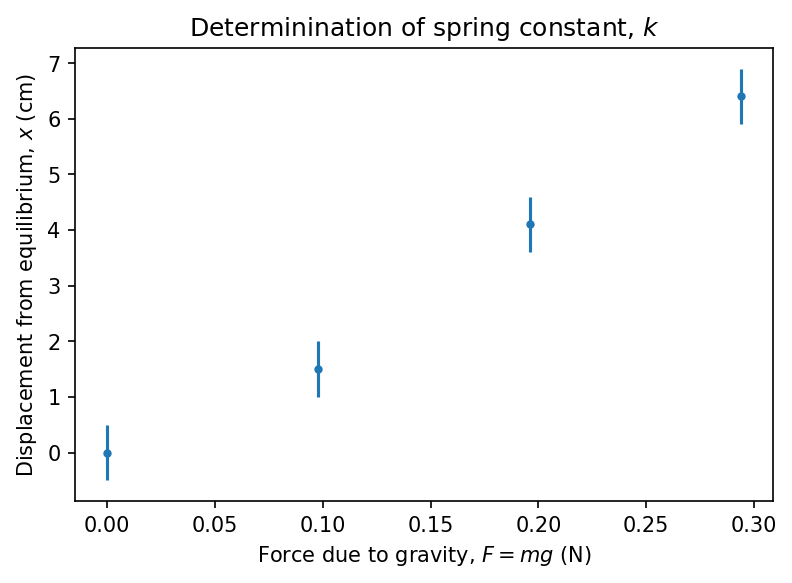

In [ ]:
fig,ax = plt.subplots()
ax.errorbar(F, x, dx, fmt='.')

ax.set_title("Determinination of spring constant, $k$")
ax.set_xlabel("Force due to gravity, $F=mg$ (N)")
ax.set_ylabel("Displacement from equilibrium, $x$ (cm)")
plt.show()

Next, we can fit the data to a linear function

  k = 4.495412835209873 +/- 0.4611031191998827 N/m
  x0 = 0.2700000102839838 +/- 0.41833000627548134 cm
  Reduced chi-square = 0.5160000000000006


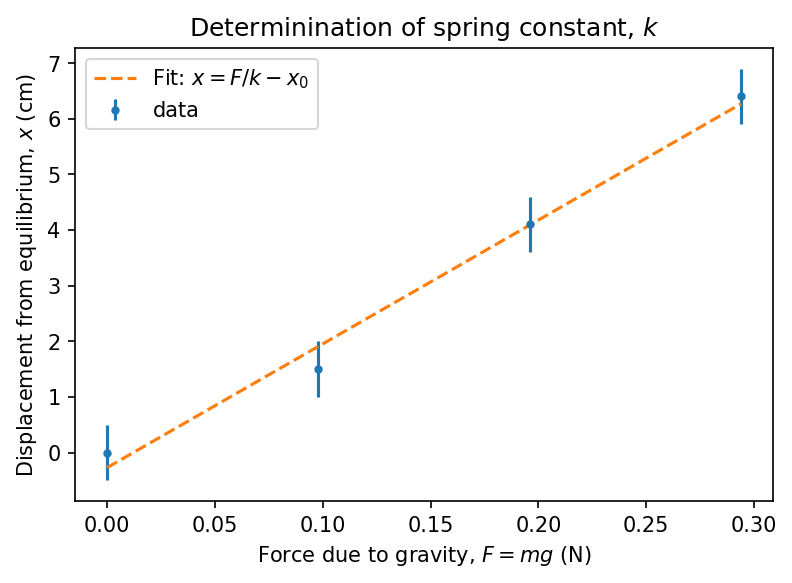

In [ ]:
#Defines fit functions
def linear(p, x):
  return (p[0]*x - p[1])

def residual(p, function, x, y, dy):
  return (function(p, x) - y)/dy

p0 = [1, 0]

#Plots and fits
fig,ax = plt.subplots()
ax.errorbar(F, x, dx, fmt='.', label='data')
pf, cov, info, mesg, success = optimize.leastsq(residual, p0,
                                 args=(linear, F, x, dx),
                                 full_output=1)
chisq = np.sum(residual(pf, linear, F, x, dx)**2)
dof = len(F)-len(pf)
k = (1/pf[0])*100                      #spring constant (in N/m)
dk = (np.sqrt(cov[0,0])/pf[0]**2)*100  #uncertainty in spring constant (in N/m)
x0 = pf[1]              #offset (in cm)
dx0 = np.sqrt(cov[1,1]) #uncertainty in offset (in cm)

X = np.linspace(0, np.max(F),100)
ax.plot(X, linear(pf, X), '--', label='Fit: $x = F/k - x_0$')

print('  k =', k, '+/-', dk, 'N/m')
print('  x0 =', x0, '+/-', dx0, 'cm')
print('  Reduced chi-square =', chisq/dof)

ax.set_title("Determinination of spring constant, $k$")
ax.set_xlabel("Force due to gravity, $F=mg$ (N)")
ax.set_ylabel("Displacement from equilibrium, $x$ (cm)")
ax.legend()
plt.show()

## Determining the natural frequency, $\omega_0$, and the damped frequencies, $\omega^{\prime}$

First, we enter values for mass (from the balance in the lab) and spring constant (from the fit above) to determine the predicted natural frequency.

In [ ]:
#Enter values below:
M = 0.200           # mass of glider and attachments (in kg)
dM = 0.001          # uncertainty in mass of glider and attachments (in kg)
k = 2.00            # spring constant (from above) (in N/m)
dk = 0.01           # uncertainty in spring constant (from above) (in N/m)

#This section calculates and displays values:
omega0 = np.sqrt(k/M)     #predicted undamped natural frequency (in rad/s)
domega0 = (omega0/2)*np.sqrt((dk/k)**2+(dM/M)**2)
                          #predicted undamped natural frequency (in rad/s)
print('Natural frequency:', omega0, '+/-', domega0)

Natural frequency: 3.1622776601683795 +/- 0.011180339887498949


Next, after you have fit the damped harmonic function to the decaying displacement data, you can see what the predicted damped oscillation frequencies are.

In [ ]:
#Enter values below:
xi_d = 0.1      # damping coefficient for the "damped" case (magnets down)
xi_u = 0.1      # damping coefficient for the "undamped" case (magnets up)

#This section calculates and displays values:
omegaprime_d = np.sqrt(omega0**2 - xi_d**2)  
                #predicted damped frequency for "damped" case (in rad/s)
omegaprime_u = np.sqrt(omega0**2 - xi_u**2) 
                #predicted damped frequency for "undamped" case (in rad/s)
print('Damped case:', omegaprime_d)
print('Undamped case:', omegaprime_u)

Damped case: 3.160696125855822
Undamped case: 3.160696125855822


## Plotting the resonance curve

###Damped oscillations

In this first cell, add your data. Note the format of the example data... your entries should be done in the same way.

In [20]:
#OPTION 1: Measuring period
#Enter values below:
T = np.array([2.081, 1.804, 0.511, 5.722])     #driving period (in seconds)
dT = np.array([0.1, 0.1, 0.1, 0.1])     #uncertainty in period (in seconds)
A = np.array([2.507, 0.5304, 1.221])     #amplitude of oscillation (in cm)
dA = np.array([0.01, 0.01, 0.01, 0.01])     #uncertainty in amplitude (in cm)

#This section computes angular frequency from the period
omega0 = 2.642
omega = 2*np.pi/T                   #freqeuncy (in rad/s)
domega = omega*dT/T                 #uncertainty in frequency (in rad/s)

#OPTION 2: Measuring frequency
#If you want to do this, uncomment the code below and delete the code above
#omega = np.array([0.75, 1.0, 1.5])     #freqeuncy (in rad/s)
#domega = np.array([0.1, 0.1, 0.1])     #uncertainty in frequency (in rad/s)
#A = np.array([3.4, 14.1, 5.2])     #amplitude of oscillation (in cm)
#dA = np.array([0.5, 0.5, 0.5])     #uncertainty in amplitude (in cm)

interactive(children=(FloatSlider(value=0.1, description='omegamin', max=20.0, min=0.1), FloatSlider(value=20.…

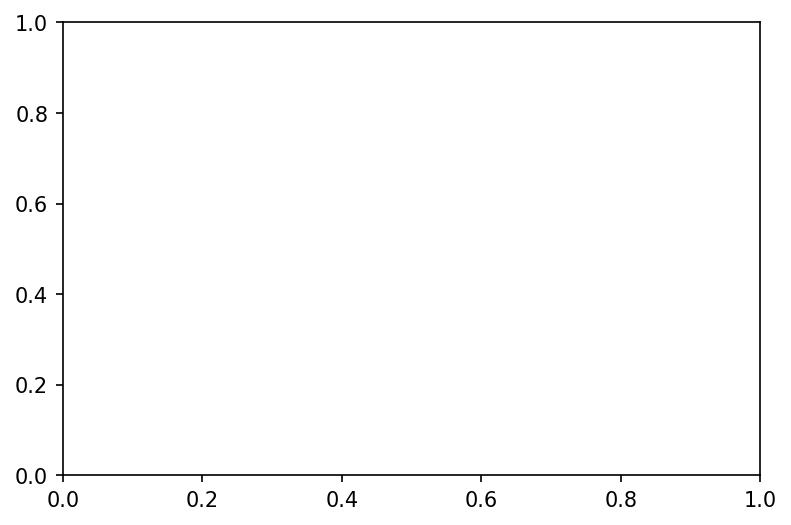

In [21]:
@widgets.interact(omegamin = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=0.1),
                  omegamax = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=20),
                  logplot = widgets.Checkbox(value=False,
                                             description= 'log-log plot?'))

def update(omegamin, omegamax, logplot):
   fig,ax = plt.subplots()
   ax.errorbar(omega, A, yerr= dA, xerr = domega, fmt='.')
   ax.axvline(omega0, linestyle='--', color='r', label='$\omega_0$')
   
   ax.set_title("Resonance Curve (Damped)")
   ax.set_xlabel("Driving force, $\omega$ (rad/s)")
   ax.set_ylabel("Amplitude of oscillation, $A$ (cm)")
   ax.legend()

   if omegamax > omegamin:
       ax.set_xlim([omegamin,omegamax])
   if logplot == True:
      ax.set_yscale('log')
      ax.set_xscale('log')

###OPTIONAL: Undamped oscillations

In this first cell, add your data. Note the format of the example data... your entries should be done in the same way.

In [ ]:
#OPTION 1: Measuring period
#Enter values below:
T_u = np.array([0.75, 1.0, 1.5])     #driving period (in seconds)
dT_u = np.array([0.1, 0.1, 0.1])     #uncertainty in period (in seconds)
A_u = np.array([3.4, 14.1, 5.2])     #amplitude of oscillation (in cm)
dA_u = np.array([0.5, 0.5, 0.5])     #uncertainty in amplitude (in cm)

#This section computes angular frequency from the period
omega_u = 2*np.pi/T                   #freqeuncy (in rad/s)
domega_u = omega*dT/T                 #uncertainty in frequency (in rad/s)

#OPTION 2: Measuring frequency
#If you want to do this, uncomment the code below and delete the code above
#omega_u = np.array([0.75, 1.0, 1.5])     #freqeuncy (in rad/s)
#domega_u = np.array([0.1, 0.1, 0.1])     #uncertainty in frequency (in rad/s)
#A_u = np.array([3.4, 14.1, 5.2])     #amplitude of oscillation (in cm)
#dA_u = np.array([0.5, 0.5, 0.5])     #uncertainty in amplitude (in cm)

In [ ]:
@widgets.interact(omegamin = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=0.1),
                  omegamax = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=20),
                  logplot = widgets.Checkbox(value=False,
                                             description= 'log-log plot?'))

def update(omegamin, omegamax, logplot):
   fig,ax = plt.subplots()
   ax.errorbar(omega, A, yerr= dA, xerr = domega, fmt='.')
   ax.axvline(omega0, linestyle='--', color='r', label='$\omega_0$')
   
   ax.set_title("Resonance Curve (Undamped)")
   ax.set_xlabel("Driving force, $\omega$ (rad/s)")
   ax.set_ylabel("Amplitude of oscillation, $A$ (cm)")
   ax.legend()

   if omegamax > omegamin:
       ax.set_xlim([omegamin,omegamax])
   if logplot == True:
      ax.set_yscale('log')
      ax.set_xscale('log')

interactive(children=(FloatSlider(value=0.1, description='omegamin', max=20.0, min=0.1), FloatSlider(value=20.…